Baixando as bibliotecas necessárias e importando o CSV limpo

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
dataQ = pd.read_csv("./csv_limpo", sep=",")
dataQ.columns = dataQ.columns.str.strip()
dataQ

,Unnamed: 0,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,single,2nd phase - general contingent,5,Animation and Multimedia Design,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,single,International student (bachelor),1,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,2,single,1st phase - general contingent,5,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,3,single,2nd phase - general contingent,2,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,4,married,Over 23 years old,1,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,4419,single,1st phase - general contingent,6,Journalism and Communication,daytime,Secondary education,125.0,Portuguese,Secondary Education - 12th Year of Schooling o...,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,4420,single,1st phase - general contingent,2,Journalism and Communication,daytime,Secondary education,120.0,Russian,Secondary Education - 12th Year of Schooling o...,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,4421,single,1st phase - general contingent,1,Nursing,daytime,Secondary education,154.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,4422,single,1st phase - general contingent,1,Management,daytime,Secondary education,180.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


Verificando em um gráfico de barras a quantidade de registros cada categoria da variável Target, onde é mostrado o status dos alunos

/tmp/ipykernel_16973/3633279914.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette="pastel")


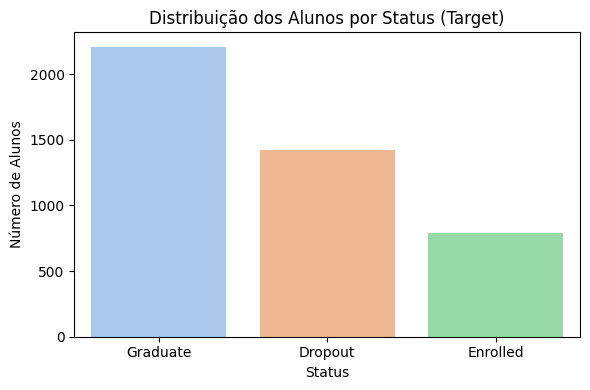

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [7]:
target_counts = dataQ["Target"].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values, palette="pastel")
plt.title("Distribuição dos Alunos por Status (Target)")
plt.ylabel("Número de Alunos")
plt.xlabel("Status")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

target_counts

Visualizando um gráfico de pizza, para mostrar visualmente a proporção de Evasões por Curso, vemos que Gestão no periodo da noite, enfermagem, jornalismo e comunicação são os cursos com mais evasão

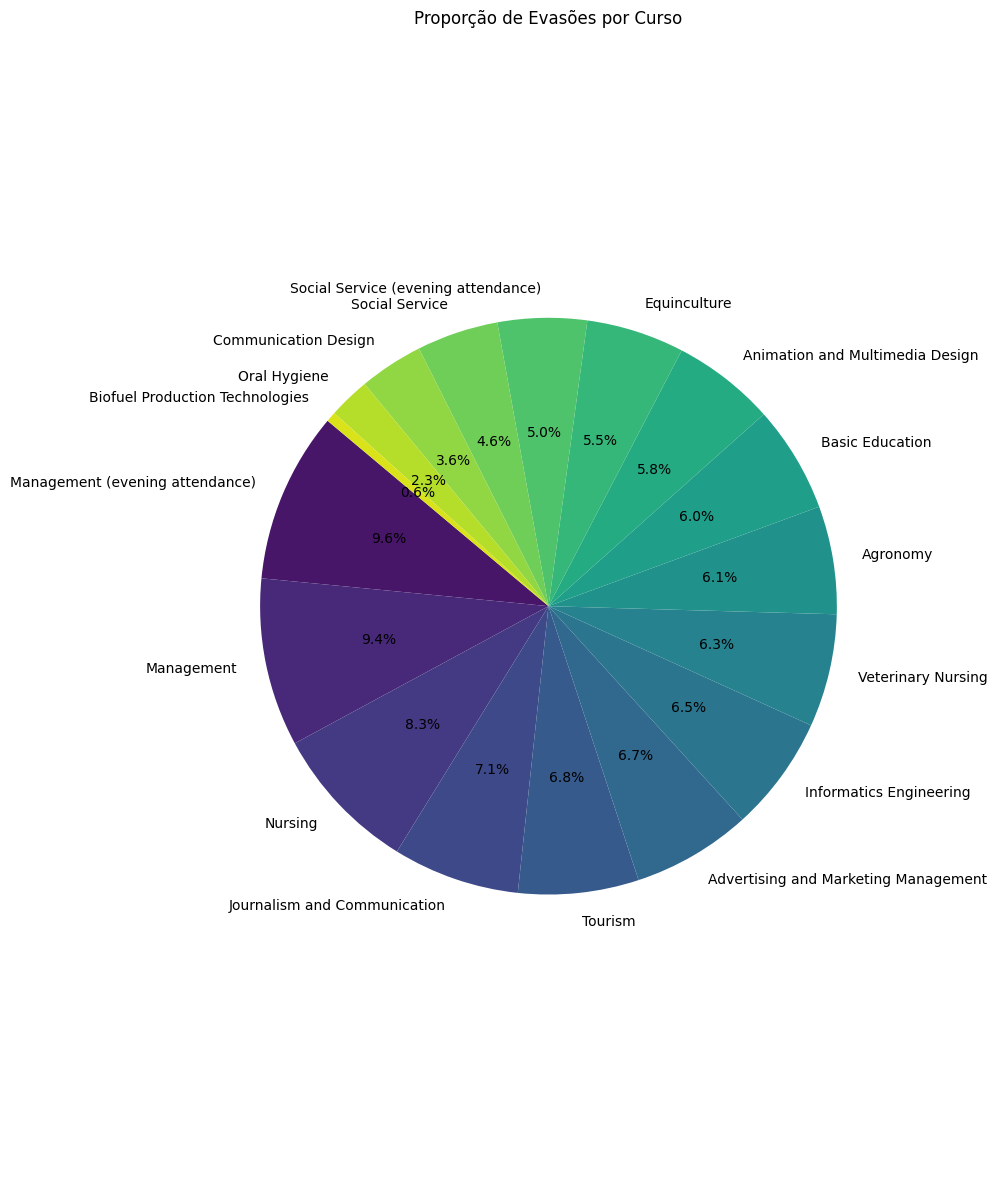

In [8]:
evasao_por_curso = dataQ[dataQ['Target'] == 'Dropout']['Course'].value_counts()
plt.figure(figsize=(10, 12))
plt.pie(evasao_por_curso.values, labels=evasao_por_curso.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(evasao_por_curso)))
plt.title("Proporção de Evasões por Curso")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [9]:
qnt =(dataQ["Gender"] == "male").sum()

print(f"Quantidade de alunos do sexo masculino: {qnt}")

qnt2 =(dataQ["Gender"] == "female").sum()

print(f"Quantidade de alunos do sexo feminino: {qnt2}")

Quantidade de alunos do sexo masculino: 1556
Quantidade de alunos do sexo feminino: 2868


Analisando graficamente vemos que a taxa de evasão do sexo masculino é maior que o feminino

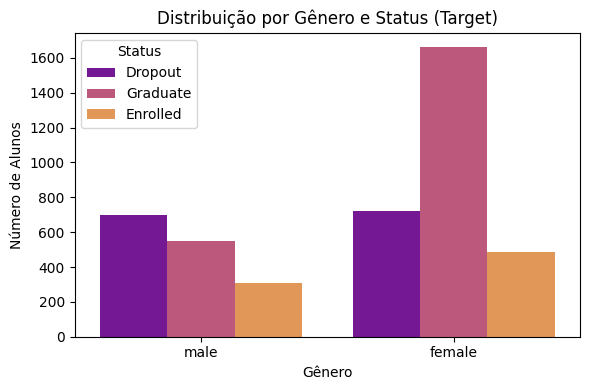

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dataQ, x="Gender", hue="Target", palette="plasma")
plt.title("Distribuição por Gênero e Status (Target)")
plt.ylabel("Número de Alunos")
plt.xlabel("Gênero")
plt.legend(title="Status")
plt.tight_layout()
plt.show()
